# Augmentations

In [21]:
# augmentations_to_test = [
#     # "none",
#     # "light",
#     # "medium",
#     # "heavy",
#     # "grayscale",
#     # "randaugment",
#     "mixup",
#     "cutmix"]

<!-- ##### Simple model do test augmentations -->

In [22]:
# def build_model(num_classes):
#     base = keras.applications.EfficientNetB0(
#         input_shape=(224, 224, 3),
#         include_top=False,
#         weights="imagenet",
#         pooling="avg"
#     )
#     base.trainable = False  # You can fine-tune later

#     inputs = keras.Input(shape=(224, 224, 3))
#     x = base(inputs, training=False)
#     x = keras.layers.Dropout(0.2)(x)
#     outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

#     return keras.Model(inputs, outputs)

In [23]:
# def sample_dataset(dataset, fraction=None, num_batches=None, seed=42):
#     """Return a sampled subset of the dataset."""
#     if fraction:
#         dataset = dataset.shuffle(1000, seed=seed)
#         dataset = dataset.take(int(fraction * tf.data.experimental.cardinality(dataset).numpy()))
#     elif num_batches:
#         dataset = dataset.take(num_batches)
#     return dataset

<!-- ##### Loop -->

In [24]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=5,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


In [25]:
# augmentations_to_test = [
#     "none",
#     "light",
#     "medium",
#     "heavy",
#     "grayscale",
#     "randaugment",
#     "mixup",
#     "cutmix"]

In [26]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=15,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


# Testing preprocessing

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory



In [28]:

from classes import *
from functions import *


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def visualize_batch(dataset, class_names, minority_class=None, num_images=32, sort_by_classname=True):
    """
    Visualize a batch of images with their class labels.

    Parameters:
    - dataset: tf.data.Dataset object
    - class_names: list of class names
    - minority_class: list of minority class names to color in red (others in blue)
    - num_images: number of images to display (default = 32)
    - sort_by_classname: if True, sort images by class name
    """
    for image_batch, label_batch in dataset.take(1):
        label_indices = tf.argmax(label_batch, axis=-1).numpy()
        image_batch_np = image_batch.numpy()
        
        total_images = image_batch_np.shape[0]
        print(f"Total images in this batch: {total_images}")
        print("Sample image shape:", image_batch_np[0].shape)
        print("Sample pixels:", image_batch_np[0][:1, :32, :])

        # Zip images with labels
        image_label_pairs = list(zip(image_batch_np, label_indices))
        
        # Sort by class name if desired
        if sort_by_classname:
            image_label_pairs.sort(key=lambda x: class_names[x[1]])

        # Plot the images
        plt.figure(figsize=(20, 20))
        rows = int(np.ceil(num_images / 8))
        for i in range(min(num_images, len(image_label_pairs))):
            img, label_idx = image_label_pairs[i]
            class_name = class_names[label_idx]
            color = "red" if minority_class and class_name in minority_class else "blue"

            plt.subplot(rows, 8, i + 1)
            plt.imshow(img)
            plt.title(class_name, fontsize=8, color=color)
            plt.axis("off")

        plt.tight_layout()
        plt.show()
        break  # Only show one batch

In [30]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

In [31]:
#Load the DataFrames from the .pkl files
with open("../data/train_df.pkl", "rb") as f:
     train_df = pickle.load(f)

with open("../data/val_df.pkl", "rb") as f:
     val_df = pickle.load(f)

with open("../data/test_df.pkl", "rb") as f:
     test_df = pickle.load(f)

with open("../data/train_df_sampled.pkl", "rb") as f:
     train_df_sampled = pickle.load(f)

with open("../data/family_encoder.pkl", "rb") as f:
     family_encoder = pickle.load(f)

In [32]:
minority_class = train_df['family'].value_counts()[train_df['family'].value_counts() < 25].index
minority_class=minority_class.to_list()

In [46]:
# Load dataset (can be oversampled and/or augmented)
train_ds, class_names = preprocess.load_img(
    data_dir="../data/rare_species/train_sampled",
    minority_class=minority_class,
    augment="heavy",  # or any other augment
    oversampling=True,
    shuffle=True
)

Found 4194 files belonging to 202 classes.


Total images in this batch: 32
Sample image shape: (224, 224, 3)
Sample pixels: [[[0.6258601  0.637036   0.6386214 ]
  [0.6942608  0.7069542  0.7080262 ]
  [0.68958753 0.70217365 0.70051104]
  [0.67564595 0.6883537  0.6828022 ]
  [0.6720944  0.68624985 0.67832404]
  [0.6767103  0.69233197 0.68826467]
  [0.68162733 0.6963969  0.69642925]
  [0.67756253 0.691135   0.69247955]
  [0.6836107  0.69638395 0.69784474]
  [0.6808653  0.69252586 0.6938121 ]
  [0.67999834 0.69149053 0.6927415 ]
  [0.68419945 0.6966501  0.6980722 ]
  [0.67801213 0.691324   0.69279826]
  [0.68143195 0.69547683 0.6963093 ]
  [0.6785094  0.6942497  0.6917171 ]
  [0.6729091  0.6876017  0.68019664]
  [0.6727623  0.6858218  0.6792312 ]
  [0.68606824 0.69856    0.69566953]
  [0.6926996  0.7056859  0.70608485]
  [0.697152   0.70969725 0.71129626]
  [0.6986785  0.7111613  0.71283686]
  [0.6967958  0.709209   0.7104621 ]
  [0.6963298  0.7083342  0.7088226 ]
  [0.69349134 0.7052388  0.70388323]
  [0.68532336 0.6986089  0.69453

2025-04-19 23:02:55.250275: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


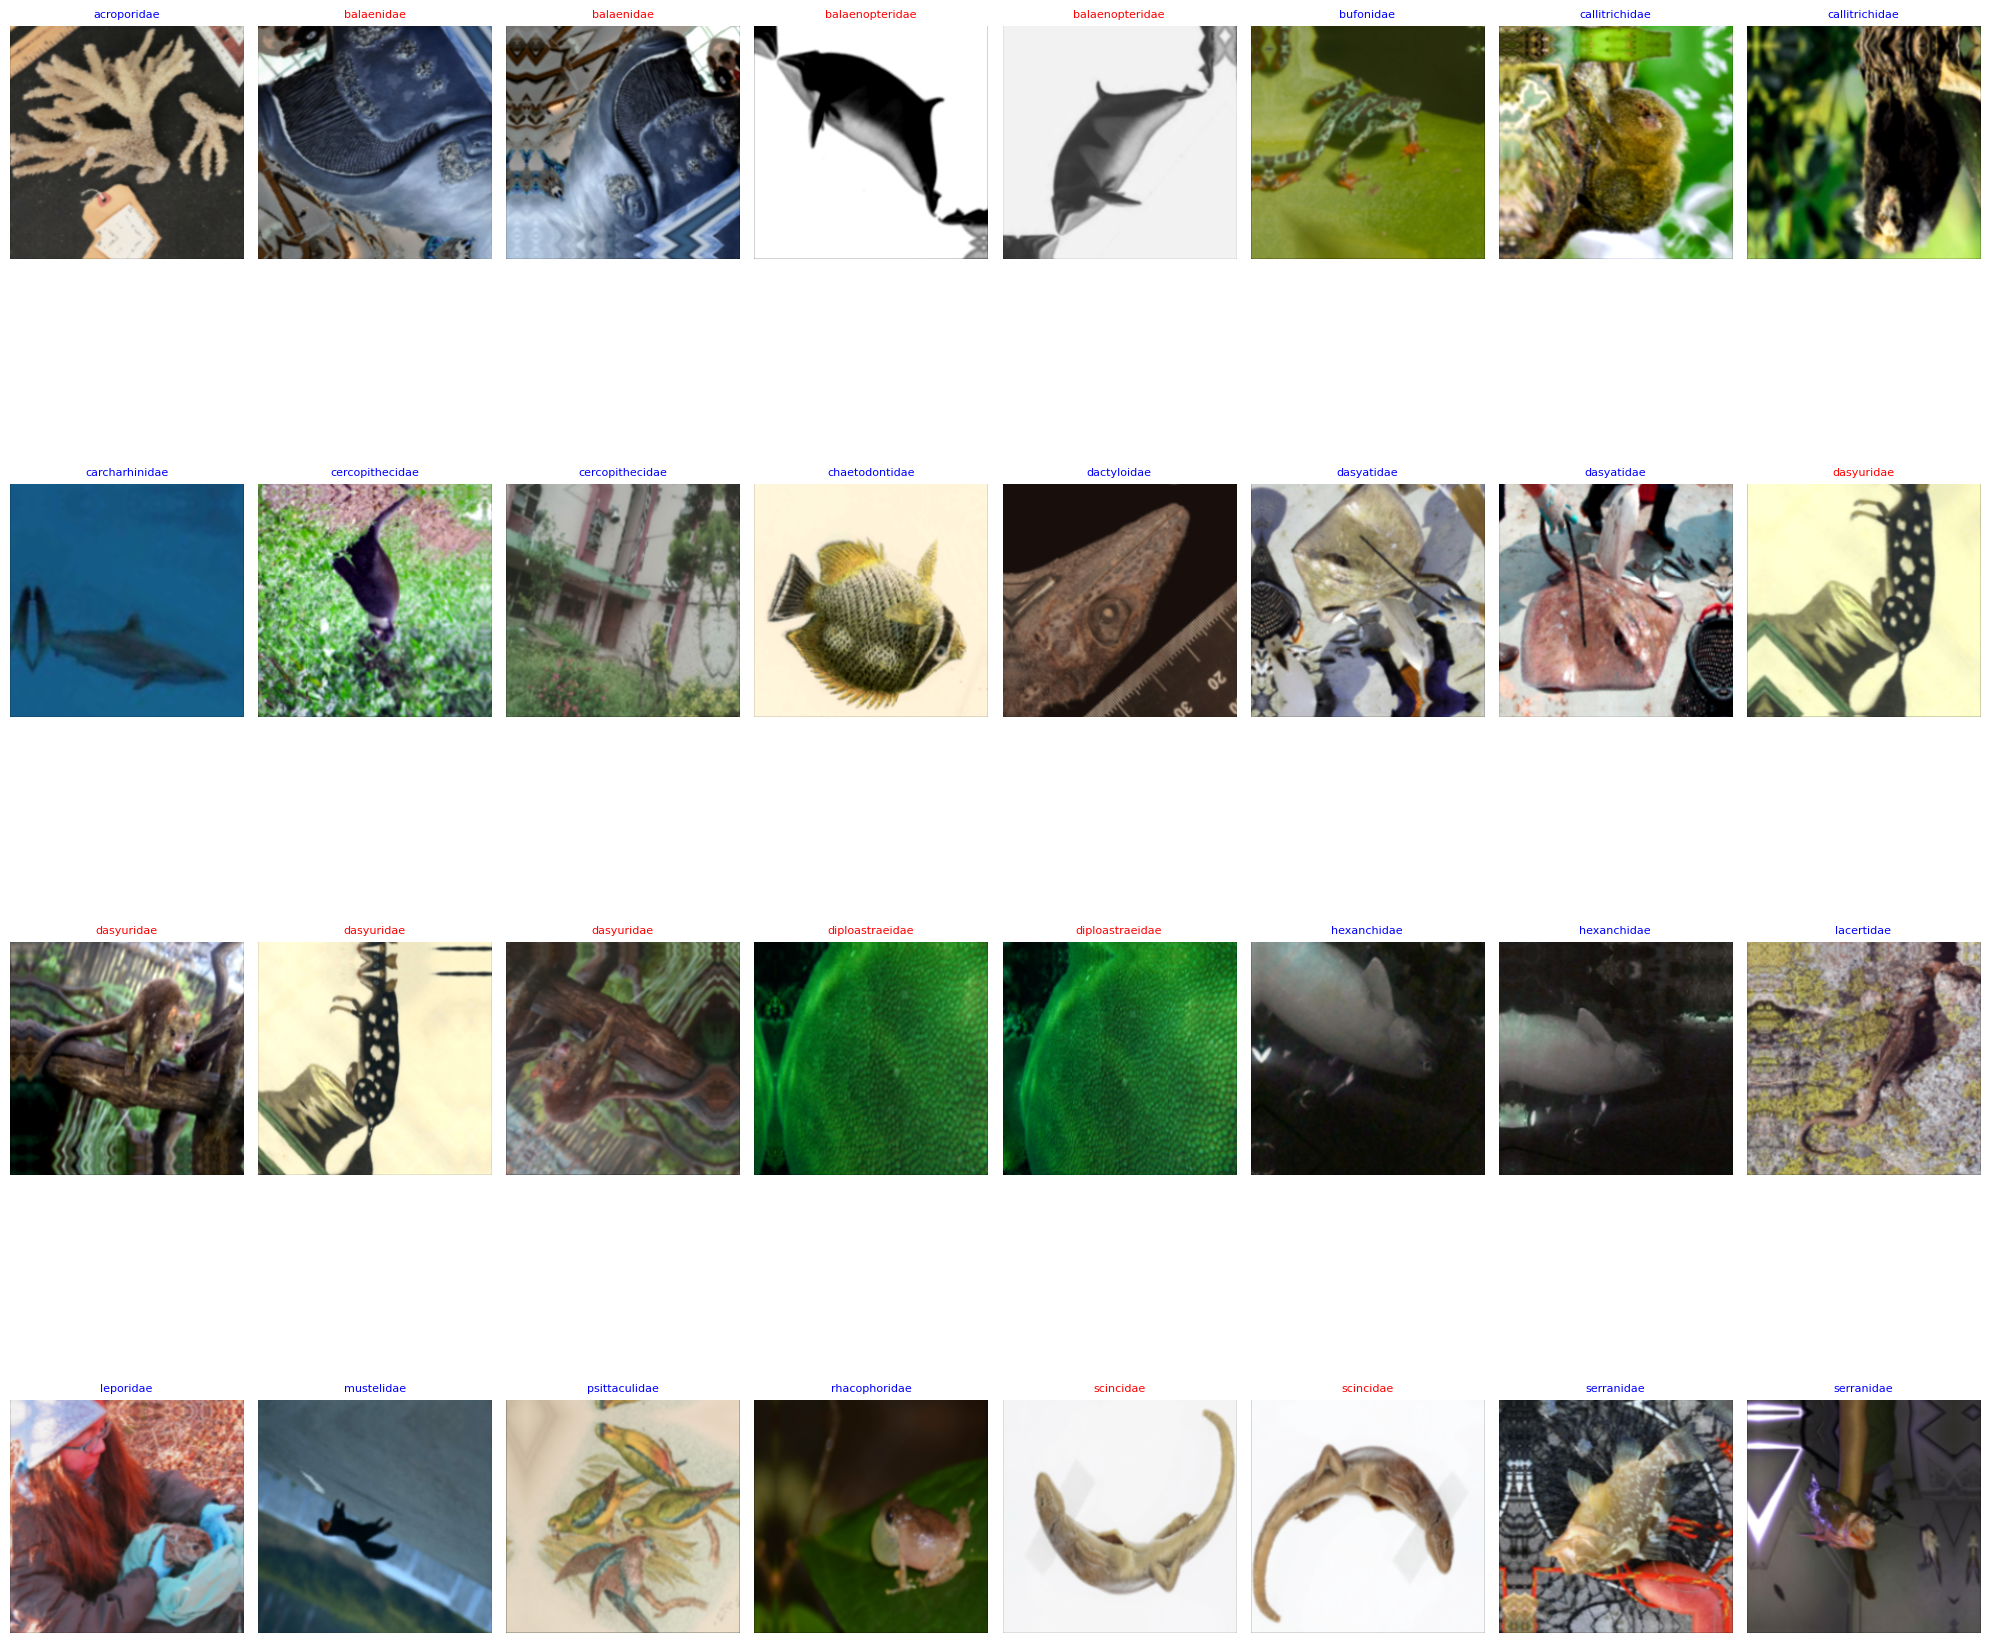

In [47]:
# Visualize a batch
visualize_batch(train_ds, class_names, num_images=32, minority_class=minority_class)

In [15]:
def train_single_family(
    train_df_sampled: pd.DataFrame,
    image_base_path: Path,
    base_output_dir: Path,
    target_family: str,
    augment: str = None,
    oversampling: bool = False,
    batch_size: int = 32,
    epochs: int = 5
):
    """
    1) Subset train_df_sampled to one family
    2) Copy into <base_output_dir>/train_single_<family>
    3) Call YOUR preprocess.load_img on that folder
    4) Sanity‑check normalization, then train Flatten→Dense(sigmoid)
    """
    # 1) filter
    df_single = train_df_sampled[train_df_sampled["family"] == target_family]

    # 2) copy files
    split_name = f"train_single_{target_family}"
    organize_split(
        image_base_path=image_base_path,
        base_output_dir=base_output_dir,
        split_df=df_single,
        copy=True,
        split_name=split_name
    )
    df_single = update_paths(df_single, split_name)

    # 3) load through your pipeline
    data_dir = base_output_dir / split_name
    batch_size = 32
    image_size = (224, 224)

    preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

    train_ds, class_names = preprocess.load_img(
        data_dir=str(data_dir),
        minority_class=[target_family],
        augment=augment,
        oversampling=oversampling,
        shuffle=True
    )

    # 4a) normalization check
    imgs, _ = next(iter(train_ds))
    print(f"[single] pixel min={imgs.numpy().min():.4f}, max={imgs.numpy().max():.4f}")

    # 4b) trivial model → should hit ~100%
    inp_shape = train_ds.element_spec[0].shape[1:]
    model = models.Sequential([
        layers.Input(shape=inp_shape),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model.fit(train_ds, epochs=epochs)


In [16]:
from pathlib import Path

image_base_path = Path("../data/rare_species")
base_output_dir = image_base_path
# list of all families
families = train_df_sampled["family"].unique().tolist()


In [17]:
def train_three_families(
    train_df_sampled: pd.DataFrame,
    image_base_path: Path,
    base_output_dir: Path,
    minority_family: str,
    augment: str = None,
    oversampling: bool = True,
    batch_size: int = 32,
    epochs: int = 10
):
    """
    1) Pick 2 random majority families + 1 minority
    2) Copy them into <base_output_dir>/train_three_<minority>
    3) Call YOUR preprocess.load_img (with oversampling)
    4) Sanity‑check, then train small ConvNet on 3 classes
    """
    # 1a) get majority candidates
    all_fams = list(train_df_sampled["family"].unique())
    majors = [f for f in all_fams if f != minority_family]
    maj_chosen = random.sample(majors, 2)
    fam_list = [minority_family] + maj_chosen

    # 1b) subset
    df_three = train_df_sampled[train_df_sampled["family"].isin(fam_list)]

    # 2) copy
    split_name = f"train_three_{minority_family}"
    organize_split(
        image_base_path=image_base_path,
        base_output_dir=base_output_dir,
        split_df=df_three,
        copy=True,
        split_name=split_name
    )
    df_three = update_paths(df_three, split_name)

    # 3) load
    data_dir = base_output_dir / split_name
    batch_size = 32
    image_size = (224, 224)

    preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
    
    train_ds, class_names = preprocess.load_img(
        data_dir=str(data_dir),
        minority_class=[minority_family],
        augment=augment,
        oversampling=oversampling,
        shuffle=True
    )

    # 4a) normalization check
    imgs, _ = next(iter(train_ds))
    print(f"[three] pixel min={imgs.numpy().min():.4f}, max={imgs.numpy().max():.4f}")

    # 4b) small ConvNet → expect >~70–80% quickly on 3 classes
    inp_shape = train_ds.element_spec[0].shape[1:]
    model = models.Sequential([
        layers.Input(shape=inp_shape),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(len(fam_list), activation="softmax")
    ])
    lr_sched = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True
    )
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr_sched),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model.fit(train_ds, epochs=epochs)


In [18]:
import shutil
from pathlib import Path
import pandas as pd
import tensorflow as tf

def train_toy_subset(
    train_df_sampled: pd.DataFrame,
    image_base_path: Path,
    base_output_dir: Path,
    class_list: list[str],
    samples_per_class: int = 100,
    augment: str = None,
    oversampling: bool = False,
    batch_size: int = 32,
    epochs: int = 10
):
    """
    1) Cap at samples_per_class per family in class_list
    2) Copy into a fresh <base_output_dir>/train_toy_<cls1>_<cls2>_... folder
    3) Delete that folder first if it exists, so only your chosen classes end up there
    4) Call preprocess.load_img → now class_names will be len(class_list)
    5) Sanity‑check normalization, then train small ConvNet → expect >90%
    """
    # 1) cap per class
    dfs = []
    for cls in class_list:
        sub = train_df_sampled[train_df_sampled["family"] == cls].head(samples_per_class)
        dfs.append(sub)
    df_toy = pd.concat(dfs, axis=0)

    # 2) build a unique split name
    split_name = "train_toy_" + "_".join(class_list)
    data_dir = base_output_dir / split_name

    # 3) remove any old copy of that folder
    if data_dir.exists():
        shutil.rmtree(data_dir)

    #    now copy only the df_toy rows into that empty folder
    organize_split(
        image_base_path=image_base_path,
        base_output_dir=base_output_dir,
        split_df=df_toy,
        copy=True,
        split_name=split_name
    )
    df_toy = update_paths(df_toy, split_name)

    # 4) load — now only class_list appear under data_dir
    batch_size = 32
    image_size = (224, 224)

    preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

    train_ds, class_names = preprocess.load_img(
        data_dir=str(data_dir),
        minority_class=class_list,
        augment=augment,
        oversampling=oversampling,
        shuffle=True
    )

    print(f"[toy] dataset.class_names = {class_names}")  # debug

    # 5a) normalization check
    imgs, _ = next(iter(train_ds))
    print(f"[toy] pixel min={imgs.numpy().min():.4f}, max={imgs.numpy().max():.4f}")

    # 5b) small ConvNet → expect >90% on toy subset
    inp_shape = train_ds.element_spec[0].shape[1:]
    model = models.Sequential([
        layers.Input(shape=inp_shape),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(len(class_list), activation="softmax")
    ])
    lr_sched = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True
    )
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr_sched),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model.fit(train_ds, epochs=epochs)


In [19]:
import random
# 1) single‑family: pick one at random
random_family = random.choice(families)
print("→ single family test on:", random_family)
hist1 = train_single_family(
    train_df_sampled=train_df_sampled,
    image_base_path=image_base_path,
    base_output_dir=base_output_dir,
    target_family=random_family,
    augment="heavy",
    oversampling=True,
    batch_size=32,
    epochs=5
)
print("Single‑family max acc:", max(hist1.history["accuracy"]))

→ single family test on: glareolidae
Found 11 files belonging to 1 classes.
[single] pixel min=0.0000, max=1.0000
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 1.0000 - loss: 0.3116
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Single‑family max acc: 1.0


In [20]:
# 2) three‑families: pick a (different) minority at random
#    train_three_families will internally pick 2 random majorities
random_minority = random.choice(families)
print("→ three family test with minority:", random_minority)
hist2 = train_three_families(
    train_df_sampled=train_df_sampled,
    image_base_path=image_base_path,
    base_output_dir=base_output_dir,
    minority_family=random_minority,
    augment="heavy",
    oversampling=True,
    batch_size=32,
    epochs=20
)
print("Three‑families final acc:", hist2.history["accuracy"][-1])

→ three family test with minority: giraffidae
Found 31 files belonging to 3 classes.
[three] pixel min=0.0000, max=1.0000
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.2083 - loss: 21.3348
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5104 - loss: 13.6151
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3958 - loss: 18.2915
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4167 - loss: 20.0126
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3438 - loss: 12.0381
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4167 - loss: 4.5503
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4688 - loss: 2.6715
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4479 - loss: 3.5980
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7188 - loss: 1.2348
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6146 - loss: 0.9984
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51

In [48]:
# 3) toy‑subset: pick 4 random families for a small multiclass test
toy_families = random.sample(families, k=4)
print("→ toy subset on families:", toy_families)
hist3 = train_toy_subset(
    train_df_sampled=train_df_sampled,
    image_base_path=image_base_path,
    base_output_dir=base_output_dir,
    class_list=toy_families,
    samples_per_class=100,
    augment="grayscale_plus",
    oversampling=True,
    batch_size=32,
    epochs=10
)
print("Toy‑subset final acc:", hist3.history["accuracy"][-1])

→ toy subset on families: ['pythonidae', 'ardeidae', 'mesitornithidae', 'dendrobatidae']
Found 62 files belonging to 4 classes.
Cause: could not parse the source code of <function Preprocessor.load_img.<locals>.<lambda> at 0x30bbc5440>: no matching AST found among candidates:
# coding=utf-8
lambda x: x
# coding=utf-8
lambda x, y: (preprocessing_function(x), y)
# coding=utf-8
lambda x, y: (norm_layer(x), y)
# coding=utf-8
lambda x: tf.image.rgb_to_grayscale(x)
# coding=utf-8
lambda x: tf.image.grayscale_to_rgb(x)
# coding=utf-8
lambda x: tf.image.rgb_to_grayscale(x)
# coding=utf-8
lambda x: tf.image.grayscale_to_rgb(x)
# coding=utf-8
lambda x, y: (norm_layer(x), y)
# coding=utf-8
lambda x, y: (aug_fn(x), y)
# coding=utf-8
lambda x, phylum: ({'image_input': x[0], 'phylum_input': phylum}, x[1])
# coding=utf-8
lambda x: x
# coding=utf-8
lambda x, y: ({'image_input': preprocessing_function(x['image_input']), 'phylum_input': x['phylum_input']}, y)
# coding=utf-8
lambda x, y: ({'image_input':

2025-04-19 16:46:33.369917: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.2734 - loss: 16.8020
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2852 - loss: 27.0962
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2292 - loss: 10.4305
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5456 - loss: 7.1169
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5104 - loss: 2.1390
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4948 - loss: 3.5180
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5755 - loss: 0.9755
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7773 - loss: 0.5002
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9023 - loss: 0.3241
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9492 - loss: 0.2831
Toy‑subset final acc: 0.9375


In [30]:
# 3) toy‑subset: pick 4 random families for a small multiclass test
toy_families = random.sample(families, k=4)
print("→ toy subset on families:", toy_families)
hist3 = train_toy_subset(
    train_df_sampled=train_df_sampled,
    image_base_path=image_base_path,
    base_output_dir=base_output_dir,
    class_list=toy_families,
    samples_per_class=100,
    augment="grayscale",
    oversampling=True,
    batch_size=32,
    epochs=10
)
print("Toy‑subset final acc:", hist3.history["accuracy"][-1])

→ toy subset on families: ['bombycillidae', 'recurvirostridae', 'latimeriidae', 'phasianidae']
Found 42 files belonging to 4 classes.
[toy] dataset.class_names = ['bombycillidae', 'latimeriidae', 'phasianidae', 'recurvirostridae']
[toy] pixel min=0.0000, max=1.0000
Epoch 1/10


2025-04-19 13:08:09.070056: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.2604 - loss: 11.1559
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5104 - loss: 5.0916
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2188 - loss: 18.8024
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5938 - loss: 5.6753
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6458 - loss: 3.4752
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6771 - loss: 3.6199
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5625 - loss: 2.7609
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9167 - loss: 0.3352
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9583 - loss: 0.1339
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8958 - loss: 0.3638
Toy‑subset final acc: 0.875


In [58]:
# --- Sanity‑check normalization ------------------------
for batch_images, batch_labels in train_ds.take(1):
    print("Batch shape:", batch_images.shape)
    print("Min pixel:", tf.reduce_min(batch_images).numpy())
    print("Max pixel:", tf.reduce_max(batch_images).numpy())
    # Expect min≈0.0 and max≈1.0 if Rescaling(1./255) was applied
    break

# Single‑class test:
history1 = train_single_class_ds_from_raw(
    data_root="../data/rare_species/train_sampled",
    target_class=minority_class[0],
    augment="heavy",
    oversampling=False,
    batch_size=32,
    epochs=5
)
print("Single‑class max acc:", max(history1.history["accuracy"]))

# Toy‑subset (first 4 classes) test:
history2 = train_toy_subset_ds_from_raw(
    data_root="../data/rare_species/train_sampled",
    class_list=class_names[:4],
    samples_per_class=100,
    augment="heavy",
    oversampling=False,
    batch_size=32,
    epochs=10
)
print("Toy‑subset final acc:", history2.history["accuracy"][-1])


Batch shape: (32, 224, 224, 3)
Min pixel: 0.0
Max pixel: 1.327077


2025-04-18 22:06:39.836848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_39}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-04-18 22:06:39.836901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_39}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-04-18 22:06:39.839400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node GroupCrossDeviceControlEdges_0/NoOp/_39}}]]
	 [[GroupCrossDeviceControlEdges_0/NoOp/_38]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-04-18 22:06:39.843228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{n

TypeError: image_dataset_from_directory() got an unexpected keyword argument 'classes'